<a href="https://colab.research.google.com/github/DeveloperAkram/Colab-Notebooks/blob/master/TS_02_Decomposing_and_Differencing_in_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decomposing Time Series**


**Additive Model**

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model**

y(t) = Level * Trend * Seasonality * Noise

In [75]:
# Importing Dependencies

import numpy as np
import pandas as pd

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [77]:
# Lets read the dataset

from google.colab import drive
drive._mount('/content/akramchowdhury')

Drive already mounted at /content/akramchowdhury; to attempt to forcibly remount, call drive.mount("/content/akramchowdhury", force_remount=True).


In [78]:
miles_decomp_data = pd.read_csv('/content/akramchowdhury/MyDrive/Colab Notebooks/Time Series Analysis /us-airlines-monthly-aircraft-miles-flown.csv', header = 0, parse_dates = [0])

In [79]:
miles_decomp_data.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [80]:
miles_decomp_data.index = miles_decomp_data['Month']

In [81]:
result = seasonal_decompose(miles_decomp_data['MilesMM'], model= 'additive')

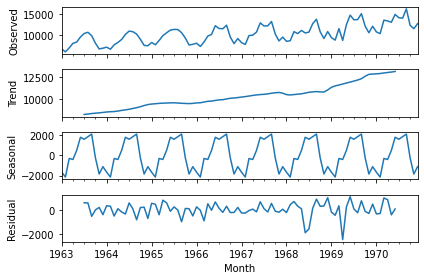

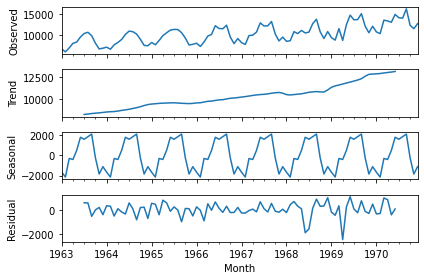

In [82]:
result.plot()

In [83]:
result2 = seasonal_decompose(miles_decomp_data['MilesMM'], model= 'multiplicative')

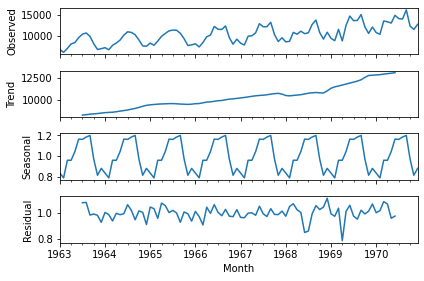

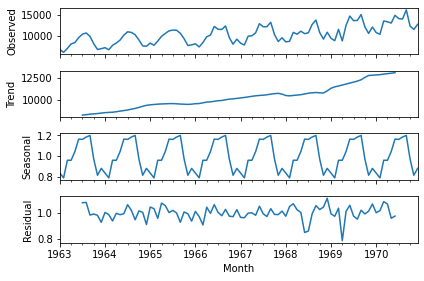

In [84]:
result2.plot()

**Differencing**

In [85]:
miles_data = pd.read_csv('/content/akramchowdhury/MyDrive/Colab Notebooks/Time Series Analysis /us-airlines-monthly-aircraft-miles-flown.csv', header= 0, parse_dates= [0])

In [86]:
miles_data.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [87]:
miles_data['lag1'] = miles_data['MilesMM'].shift(1)

In [88]:
miles_data['MilesMM_diff_1'] = miles_data['MilesMM'].diff(periods = 1)

In [89]:
miles_data.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


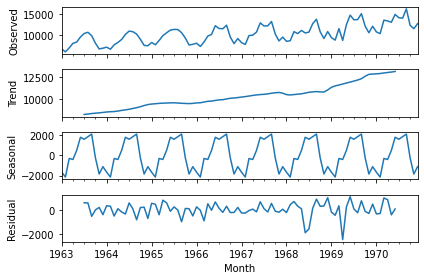

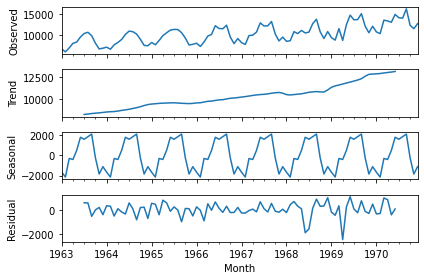

In [90]:
miles_data.index = miles_data['Month']
result_a = seasonal_decompose(miles_data['MilesMM'], model= 'additive')
result_a.plot()

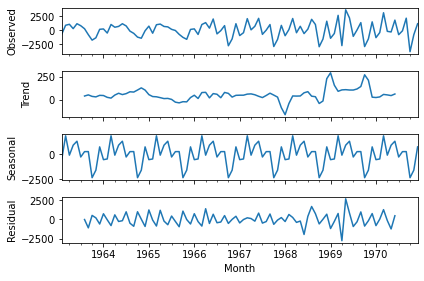

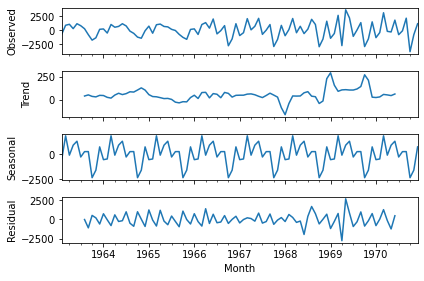

In [91]:
miles_data.index = miles_data['Month']
result_b = seasonal_decompose(miles_data.iloc[1:, 3], model= 'additive')
result_b.plot()

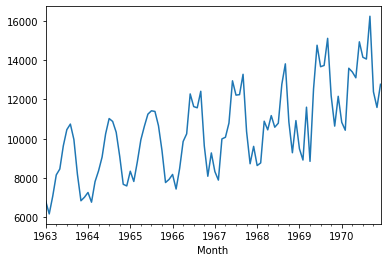

In [92]:
miles_data['MilesMM'].plot()

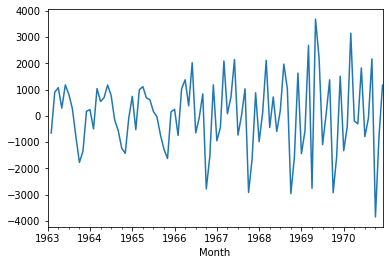

In [93]:
miles_data['MilesMM_diff_1'].plot()

In [94]:
miles_data['MilesMM_diff_12'] = miles_data['MilesMM_diff_1'].diff(periods = 12)

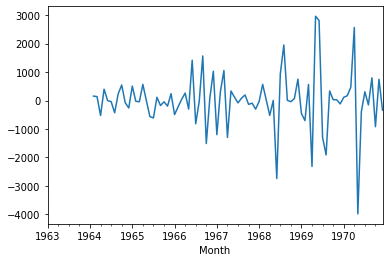

In [95]:
miles_data['MilesMM_diff_12'].plot()

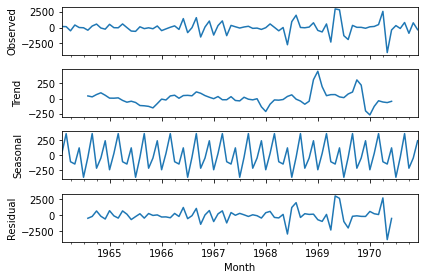

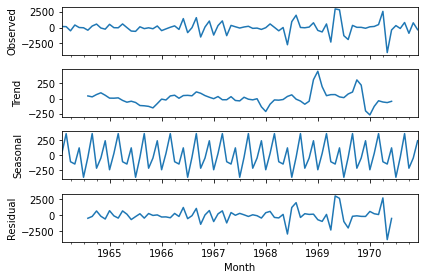

In [96]:
result_c = seasonal_decompose(miles_data.iloc[13:,4], model = 'additive')
result_c.plot()

In [97]:
miles_data.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN
